In [108]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [109]:
# Data augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [110]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [111]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [112]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [113]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])


In [114]:
# Data generators
train_generator = data_gen.flow_from_directory(
    '/kaggle/working/output/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 872 images belonging to 3 classes.


In [115]:
validation_generator = data_gen.flow_from_directory(
    '/kaggle/working/output/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 108 images belonging to 3 classes.


In [116]:
model.build((None, 224, 224, 3))

In [117]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,692,355 (105.64 MB)

 Trainable params: 12,977,667 (49.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [118]:
# Train the model
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
)


Epoch 1/60
 1/28 ━━━━━━━━━━━━━━━━━━━━ 18:18 41s/step - accuracy: 0.4688 - loss: 11.0113 - precision_10: 0.4688 - recall_10: 0.4688

W0000 00:00:1719252048.443626    1980 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/28 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5687 - loss: 22.4492 - precision_10: 0.5687 - recall_10: 0.5687  

W0000 00:00:1719252068.240811    1981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.6013 - loss: 20.6837 - precision_10: 0.6013 - recall_10: 0.6013

W0000 00:00:1719252071.898499    1982 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6049 - loss: 20.4783 - precision_10: 0.6049 - recall_10: 0.6049 - val_accuracy: 0.8981 - val_loss: 3.2299 - val_precision_10: 0.8981 - val_recall_10: 0.8981
Epoch 2/60


W0000 00:00:1719252086.757972    1981 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - accuracy: 0.8840 - loss: 4.3658 - precision_10: 0.8840 - recall_10: 0.8840 - val_accuracy: 0.9259 - val_loss: 1.5861 - val_precision_10: 0.9259 - val_recall_10: 0.9259
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 414ms/step - accuracy: 0.8948 - loss: 4.4977 - precision_10: 0.8948 - recall_10: 0.8948 - val_accuracy: 0.9352 - val_loss: 0.7330 - val_precision_10: 0.9352 - val_recall_10: 0.9352
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - accuracy: 0.9106 - loss: 2.2946 - precision_10: 0.9106 - recall_10: 0.9106 - val_accuracy: 0.9537 - val_loss: 1.0423 - val_precision_10: 0.9537 - val_recall_10: 0.9537
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.9188 - loss: 2.0323 - precision_10: 0.9188 - recall_10: 0.9188 - val_accuracy: 0.9352 - val_loss: 0.9834 - val_precision_10: 0.9352 - val_recall_10: 0.9352
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - accuracy: 0.9207 - loss: 1.3021 - precision_10: 0.9207 - recall_

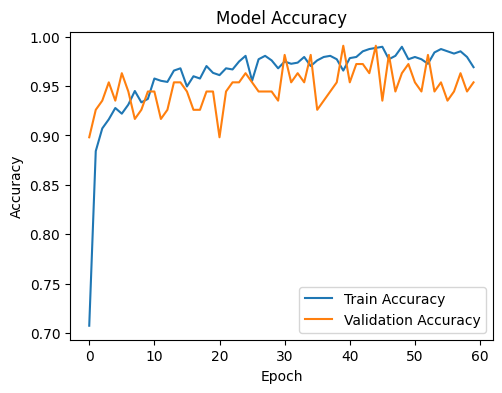

In [119]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

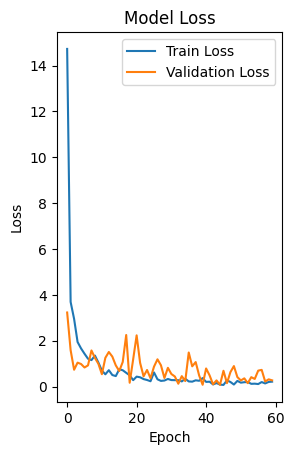

In [120]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
# Evaluation on test set
test_data_gen = ImageDataGenerator()
test_generator = test_data_gen.flow_from_directory(
    '/kaggle/working/output/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 111 images belonging to 3 classes.


In [122]:
# Predict the classes
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

W0000 00:00:1719252995.737146    1983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step 


W0000 00:00:1719253013.139216    1980 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


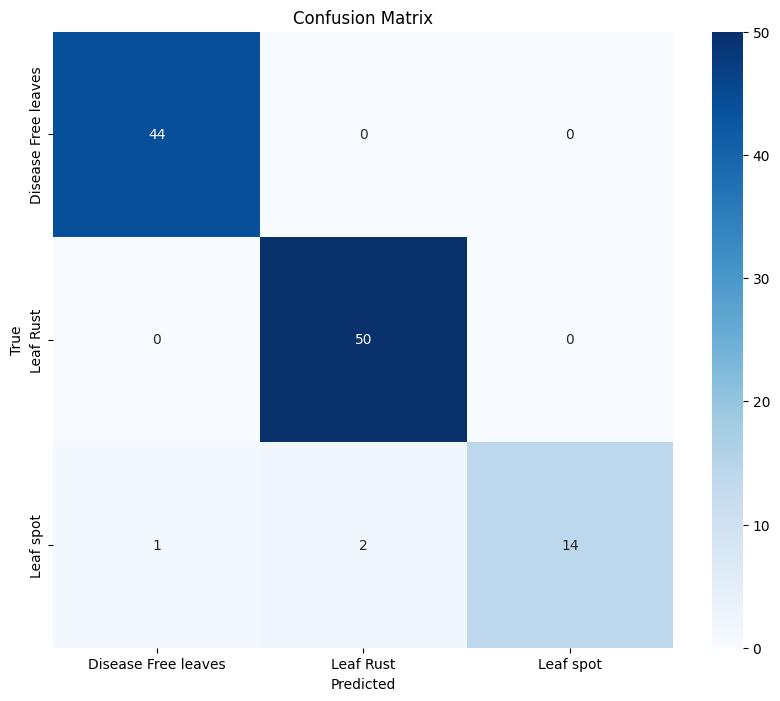

In [123]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [124]:
# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report')
print(report)


Classification Report
                     precision    recall  f1-score   support

Disease Free leaves       0.98      1.00      0.99        44
          Leaf Rust       0.96      1.00      0.98        50
          Leaf spot       1.00      0.82      0.90        17

           accuracy                           0.97       111
          macro avg       0.98      0.94      0.96       111
       weighted avg       0.97      0.97      0.97       111



In [125]:
# Precision, Recall, F1 Score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

In [126]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9739
Recall: 0.9730
F1 Score: 0.9719


In [127]:
model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.9892 - loss: 0.1802 - precision_10: 0.9892 - recall_10: 0.9892   


W0000 00:00:1719253037.790457    1982 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.45042842626571655,
 0.9729729890823364,
 0.9729729890823364,
 0.9729729890823364]